In [45]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from dython.nominal import associations
from dython.nominal import identify_nominal_columns
from dython.data_utils import identify_columns_with_na

from functions import initialize
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import dill

# Inizializzazione del dataset :
- import del dataset
- drop della feature "Sale_Price" da predirre
- split in train e test
- inizializzazione indice

In [2]:
house_df = pd.read_csv('dataset/dataHouse.csv')
def load_and_split():
    
    #displayed column range increased
    pd.set_option("display.max_columns", 100) 
    X=house_df
    y=house_df["Sale_Price"]
    
    #split dataset test and train
    return train_test_split(X,y,test_size=0.25)

# set id column as new dataset index
def set_new_index():
    house_df.set_index('id', inplace=True)
 
#read dataset

X_train, X_test,y_train, y_test = load_and_split()
#export train and test to csv
X_test.to_csv('dataset/test_data.csv', index=False)
X_train.to_csv('dataset/train_data.csv', index=False)

set_new_index()

In [21]:
X_train,X_test,house_df=initialize()    
 

In [29]:
X_train=X_train[sorted(X_train)]

# Omogeneizzazione del tipo delle colonne:
- da int64 a float64

In [4]:
def uniform_features_type(dt):
    #loop through dataset colums
    for column in dt.columns: 
        #check column type
        if dt.dtypes[column] == np.int64 : 
            #convert type from int64 to float64 
            dt[column]=dt[column].astype(np.float64)    
   
uniform_features_type(X_train)

In [5]:
identify_columns_with_na(house_df) # 0 columns with NaN values (LUCKY!)

,column,na_count


In [6]:

ALL_COLUMNS = set(X_train.columns.array) #create set with all column name
NUMERICAL_COLUMNS = set(X_train._get_numeric_data().columns) #NUMERICAL COLUMNS SET
CATEGORICAL_COLUMNS = (ALL_COLUMNS - NUMERICAL_COLUMNS ) # CATEGORICAL COLUMNS SET
print(f"CATEGORICAL: {CATEGORICAL_COLUMNS}")
print(f"NUMERICAL: {NUMERICAL_COLUMNS}")


CATEGORICAL: {'Fireplace_Qu', 'Alley', 'Paved_Drive', 'Fence', 'Roof_Style', 'Utilities', 'Bldg_Type', 'Heating_QC', 'Mas_Vnr_Type', 'Overall_Cond', 'Garage_Finish', 'Bsmt_Cond', 'Street', 'Overall_Qual', 'Land_Contour', 'Sale_Condition', 'MS_SubClass', 'Electrical', 'Exterior_2nd', 'Central_Air', 'Condition_2', 'Neighborhood', 'Exterior_1st', 'BsmtFin_Type_2', 'Roof_Matl', 'MS_Zoning', 'Garage_Cond', 'Condition_1', 'Sale_Type', 'House_Style', 'Garage_Qual', 'Foundation', 'Lot_Shape', 'Heating', 'Exter_Cond', 'Functional', 'Misc_Feature', 'Bsmt_Qual', 'Bsmt_Exposure', 'Lot_Config', 'Pool_QC', 'Land_Slope', 'BsmtFin_Type_1', 'Kitchen_Qual', 'Garage_Type', 'Exter_Qual'}
NUMERICAL: {'BsmtFin_SF_1', 'Garage_Area', 'Enclosed_Porch', 'Low_Qual_Fin_SF', 'Lot_Area', 'Bsmt_Half_Bath', 'Wood_Deck_SF', 'Year_Built', 'Open_Porch_SF', 'id', 'Mo_Sold', 'Latitude', 'Longitude', 'Year_Sold', 'Second_Flr_SF', 'Three_season_porch', 'BsmtFin_SF_2', 'Fireplaces', 'Lot_Frontage', 'Bedroom_AbvGr', 'Gr_Liv_A

In [7]:
def print_unique_column_values(column_name, dt):
    #print(f"{set(house_df[column_name])}")
    print(f"{column_name}: N° {len(set(dt[column_name]))} -- {(set(dt[column_name]))} ")

for column in sorted(CATEGORICAL_COLUMNS): #print in alphabetic order categorical features and their possible values
    print_unique_column_values(column, X_train)

Alley: N° 3 -- {'Gravel', 'No_Alley_Access', 'Paved'} 
Bldg_Type: N° 5 -- {'TwnhsE', 'Duplex', 'TwoFmCon', 'OneFam', 'Twnhs'} 
BsmtFin_Type_1: N° 7 -- {'BLQ', 'No_Basement', 'LwQ', 'Unf', 'ALQ', 'Rec', 'GLQ'} 
BsmtFin_Type_2: N° 7 -- {'BLQ', 'No_Basement', 'LwQ', 'Unf', 'ALQ', 'Rec', 'GLQ'} 
Bsmt_Cond: N° 6 -- {'No_Basement', 'Fair', 'Typical', 'Excellent', 'Good', 'Poor'} 
Bsmt_Exposure: N° 5 -- {'No_Basement', 'Av', 'Mn', 'Gd', 'No'} 
Bsmt_Qual: N° 6 -- {'No_Basement', 'Fair', 'Typical', 'Excellent', 'Good', 'Poor'} 
Central_Air: N° 2 -- {'N', 'Y'} 
Condition_1: N° 9 -- {'RRNn', 'Artery', 'Feedr', 'RRNe', 'Norm', 'RRAn', 'PosA', 'RRAe', 'PosN'} 
Condition_2: N° 8 -- {'RRNn', 'Artery', 'Feedr', 'Norm', 'RRAn', 'PosA', 'RRAe', 'PosN'} 
Electrical: N° 6 -- {'FuseP', 'FuseF', 'Unknown', 'SBrkr', 'FuseA', 'Mix'} 
Exter_Cond: N° 5 -- {'Fair', 'Typical', 'Excellent', 'Poor', 'Good'} 
Exter_Qual: N° 4 -- {'Typical', 'Fair', 'Excellent', 'Good'} 
Exterior_1st: N° 16 -- {'BrkFace', 'Wd Sdng', 

STUDIO DELLE FEATURES TRAMITE MATRICE DI CORRELAZIONE:
 - numerical features
 - categorial features
 - numerical and categorical features

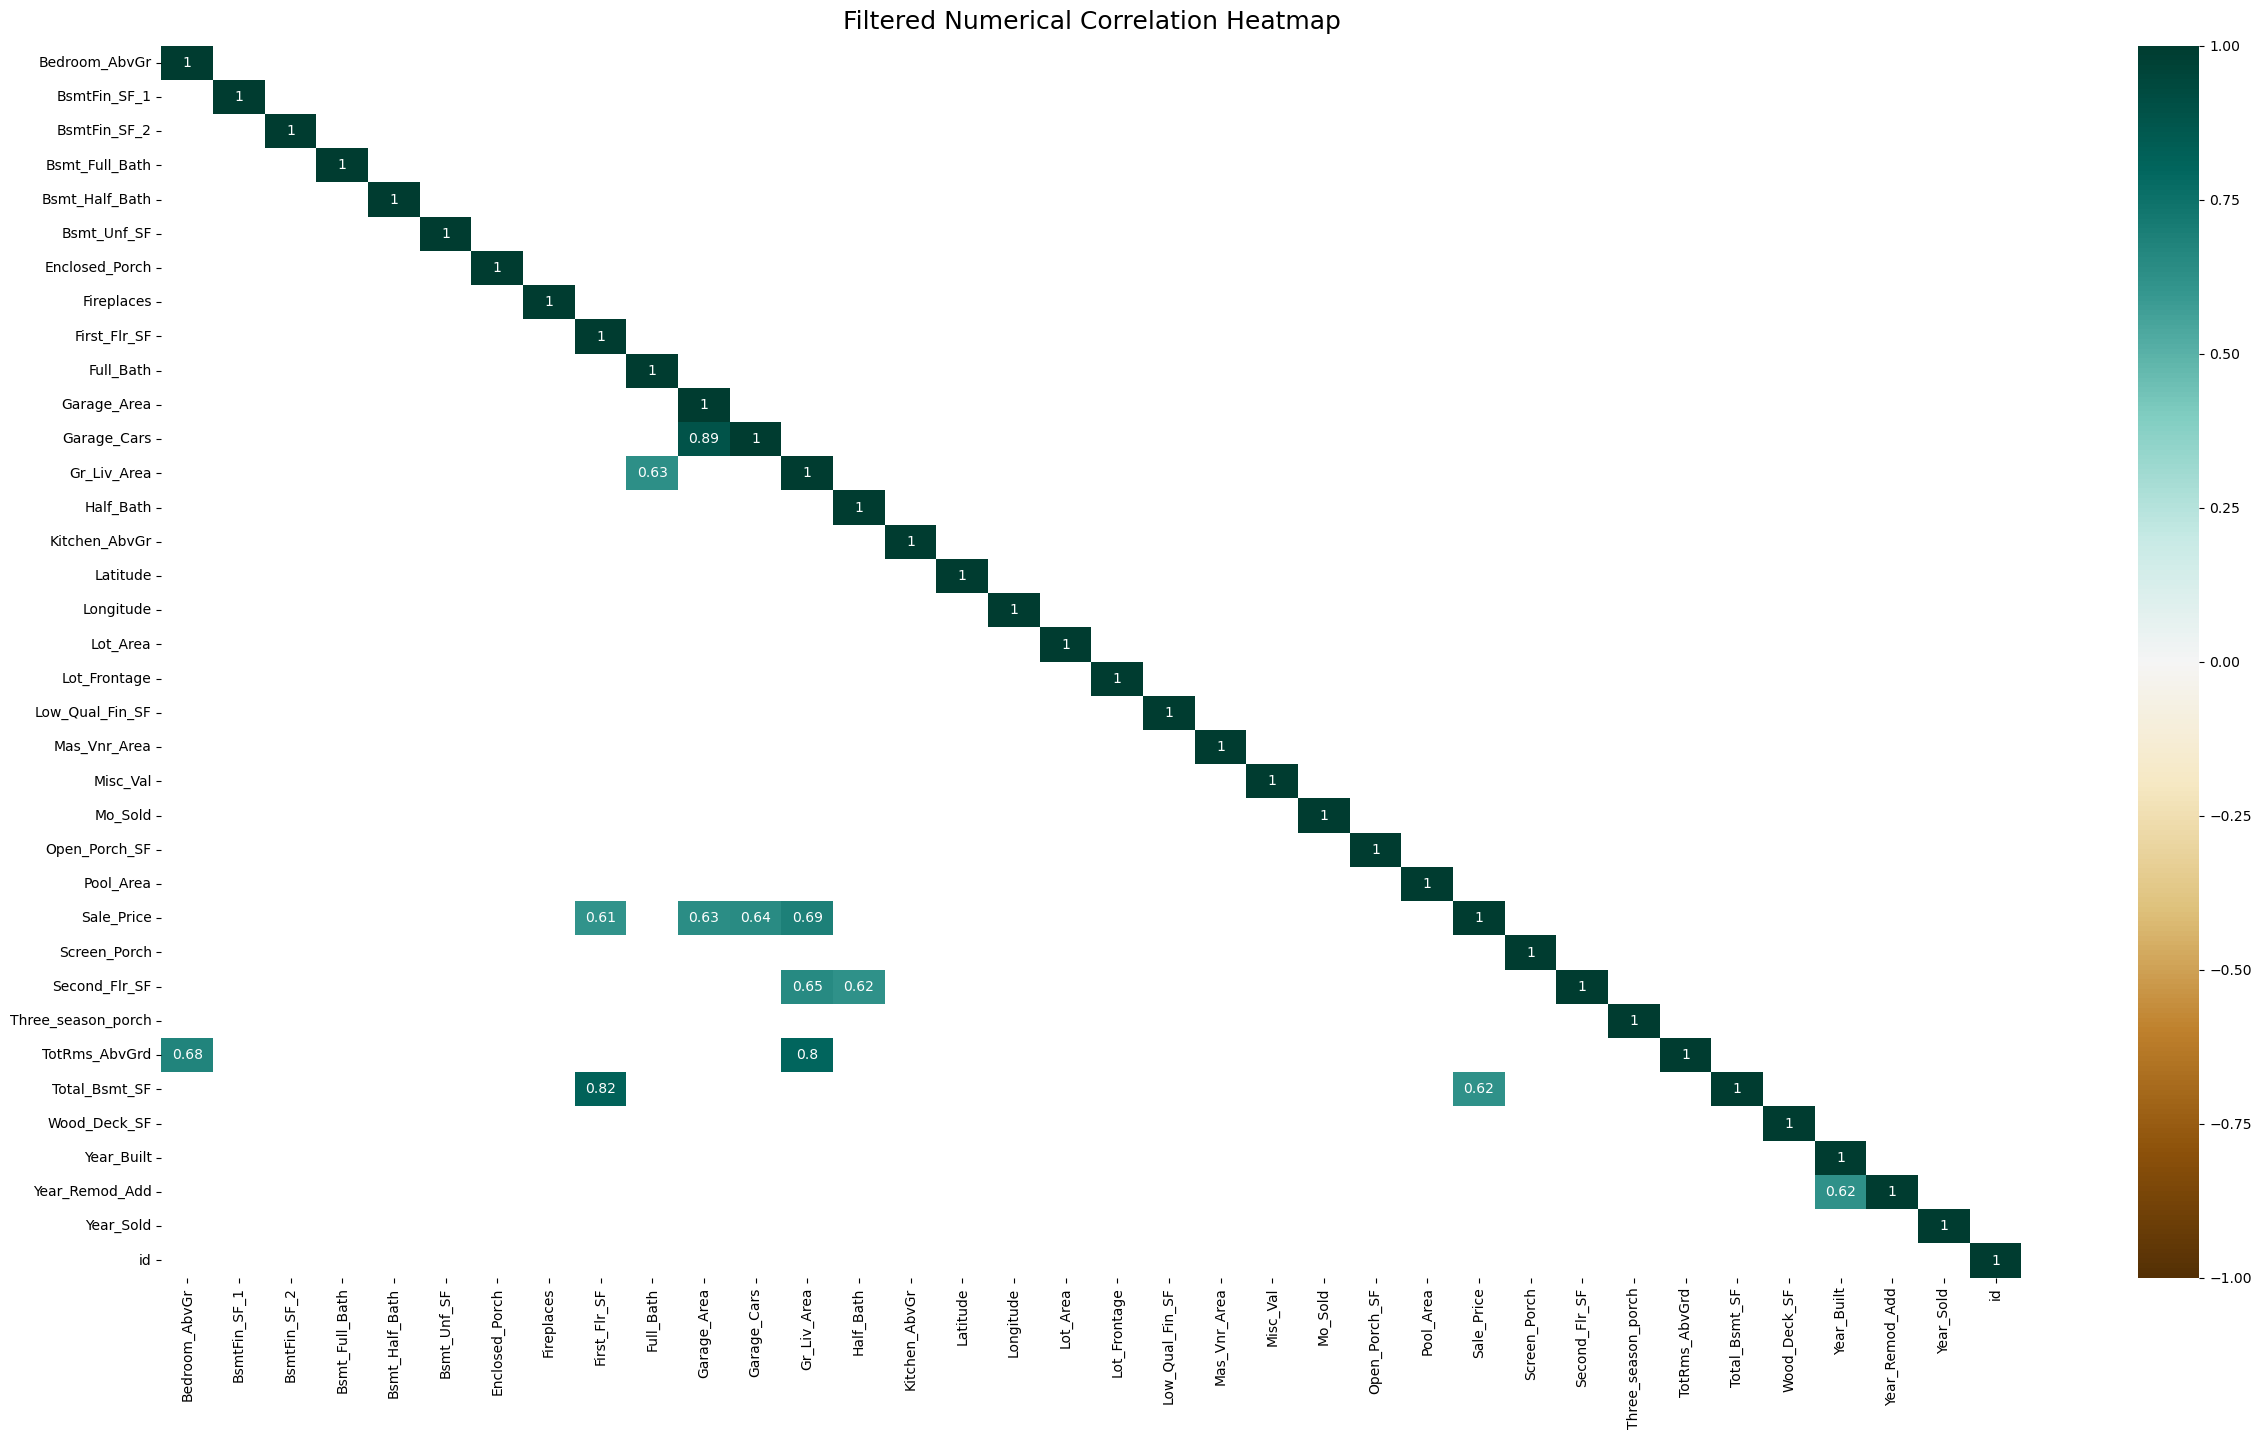

In [11]:
# Selecting the best variables and setting them as predictors for the model, check multicollinearity for model and create new features: ex. bathroom
# house_condition , quality, pool ecc.

#TODO : fare prima la verifica di multicollinearità e poi creare le variabili nuove

'''
Create correlation heatmap - lower matrix triangle of correlation matrix dataset
Visualize only values higher than a set threshold
Only numerical features
Optional image Save 
'''
def corr_heatmap(corr_matrix_dt, threshold, save_flag, w, h):#dt : -> None dataframe, threshold : threshold_values filter, save_flag : save image or not, width, height
    plt.figure(figsize= (w, h))

    mask_ = np.triu(np.ones_like(corr_matrix_dt),k=1) #lower tringle matrix - k=1 includes the matrix diagonal
    filter = np.abs(corr_matrix_dt<threshold) #correlation value filter under 

    #print upper tringle matrix values where values are upper than threshold value
    heatmap = sns.heatmap(corr_matrix_dt, mask=mask_ | filter, vmin=-1, vmax=1, annot=True, cmap='BrBG',  fmt='.2g') 
    heatmap.set_title('Filtered Numerical Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
    # save heatmap as .png file
    # dpi - sets the resolution of the saved image in dots/inches
    # bbox_inches - when set to 'tight' - does not allow the labels to be cropped
    if save_flag :
        plt.savefig(f'heatmaps/heatmap_{threshold}.png', dpi=300, bbox_inches='tight')

#
corr_heatmap(X_train.corr(), 0.6, True, 30, 16)


In [8]:
df_temp=X_train.drop(['id'], axis=1)

'''
Calculate the correlation/strength-of-association of features in data-set with both categorical and continuous features using: * 
Pearson's R for continuous-continuous cases * 
Correlation Ratio for categorical-continuous cases * 
Cramer's V or Theil's U for categorical-categorical cases
'''
def full_corr_heatmap():
    return associations(df_temp, nominal_columns='auto', numerical_columns=None, mark_columns=True, nom_nom_assoc='cramer', num_num_assoc='pearson', 
                                            cramers_v_bias_correction=True, nan_strategy='string', 
                                            ax=None, figsize=(83,83), annot=True, fmt='.2f', 
                                            cmap='BrBG', sv_color='silver', cbar=False, 
                                            vmax=1.0, vmin=None, plot=False, compute_only=True, clustering=False, title='Complete Correlation Matrix', multiprocessing=True,
                                            filename='heatmaps\complete_correlation.png')

In [9]:
complete_correlation_matrix = full_corr_heatmap()['corr'] #extract dataset object from returned ogbject

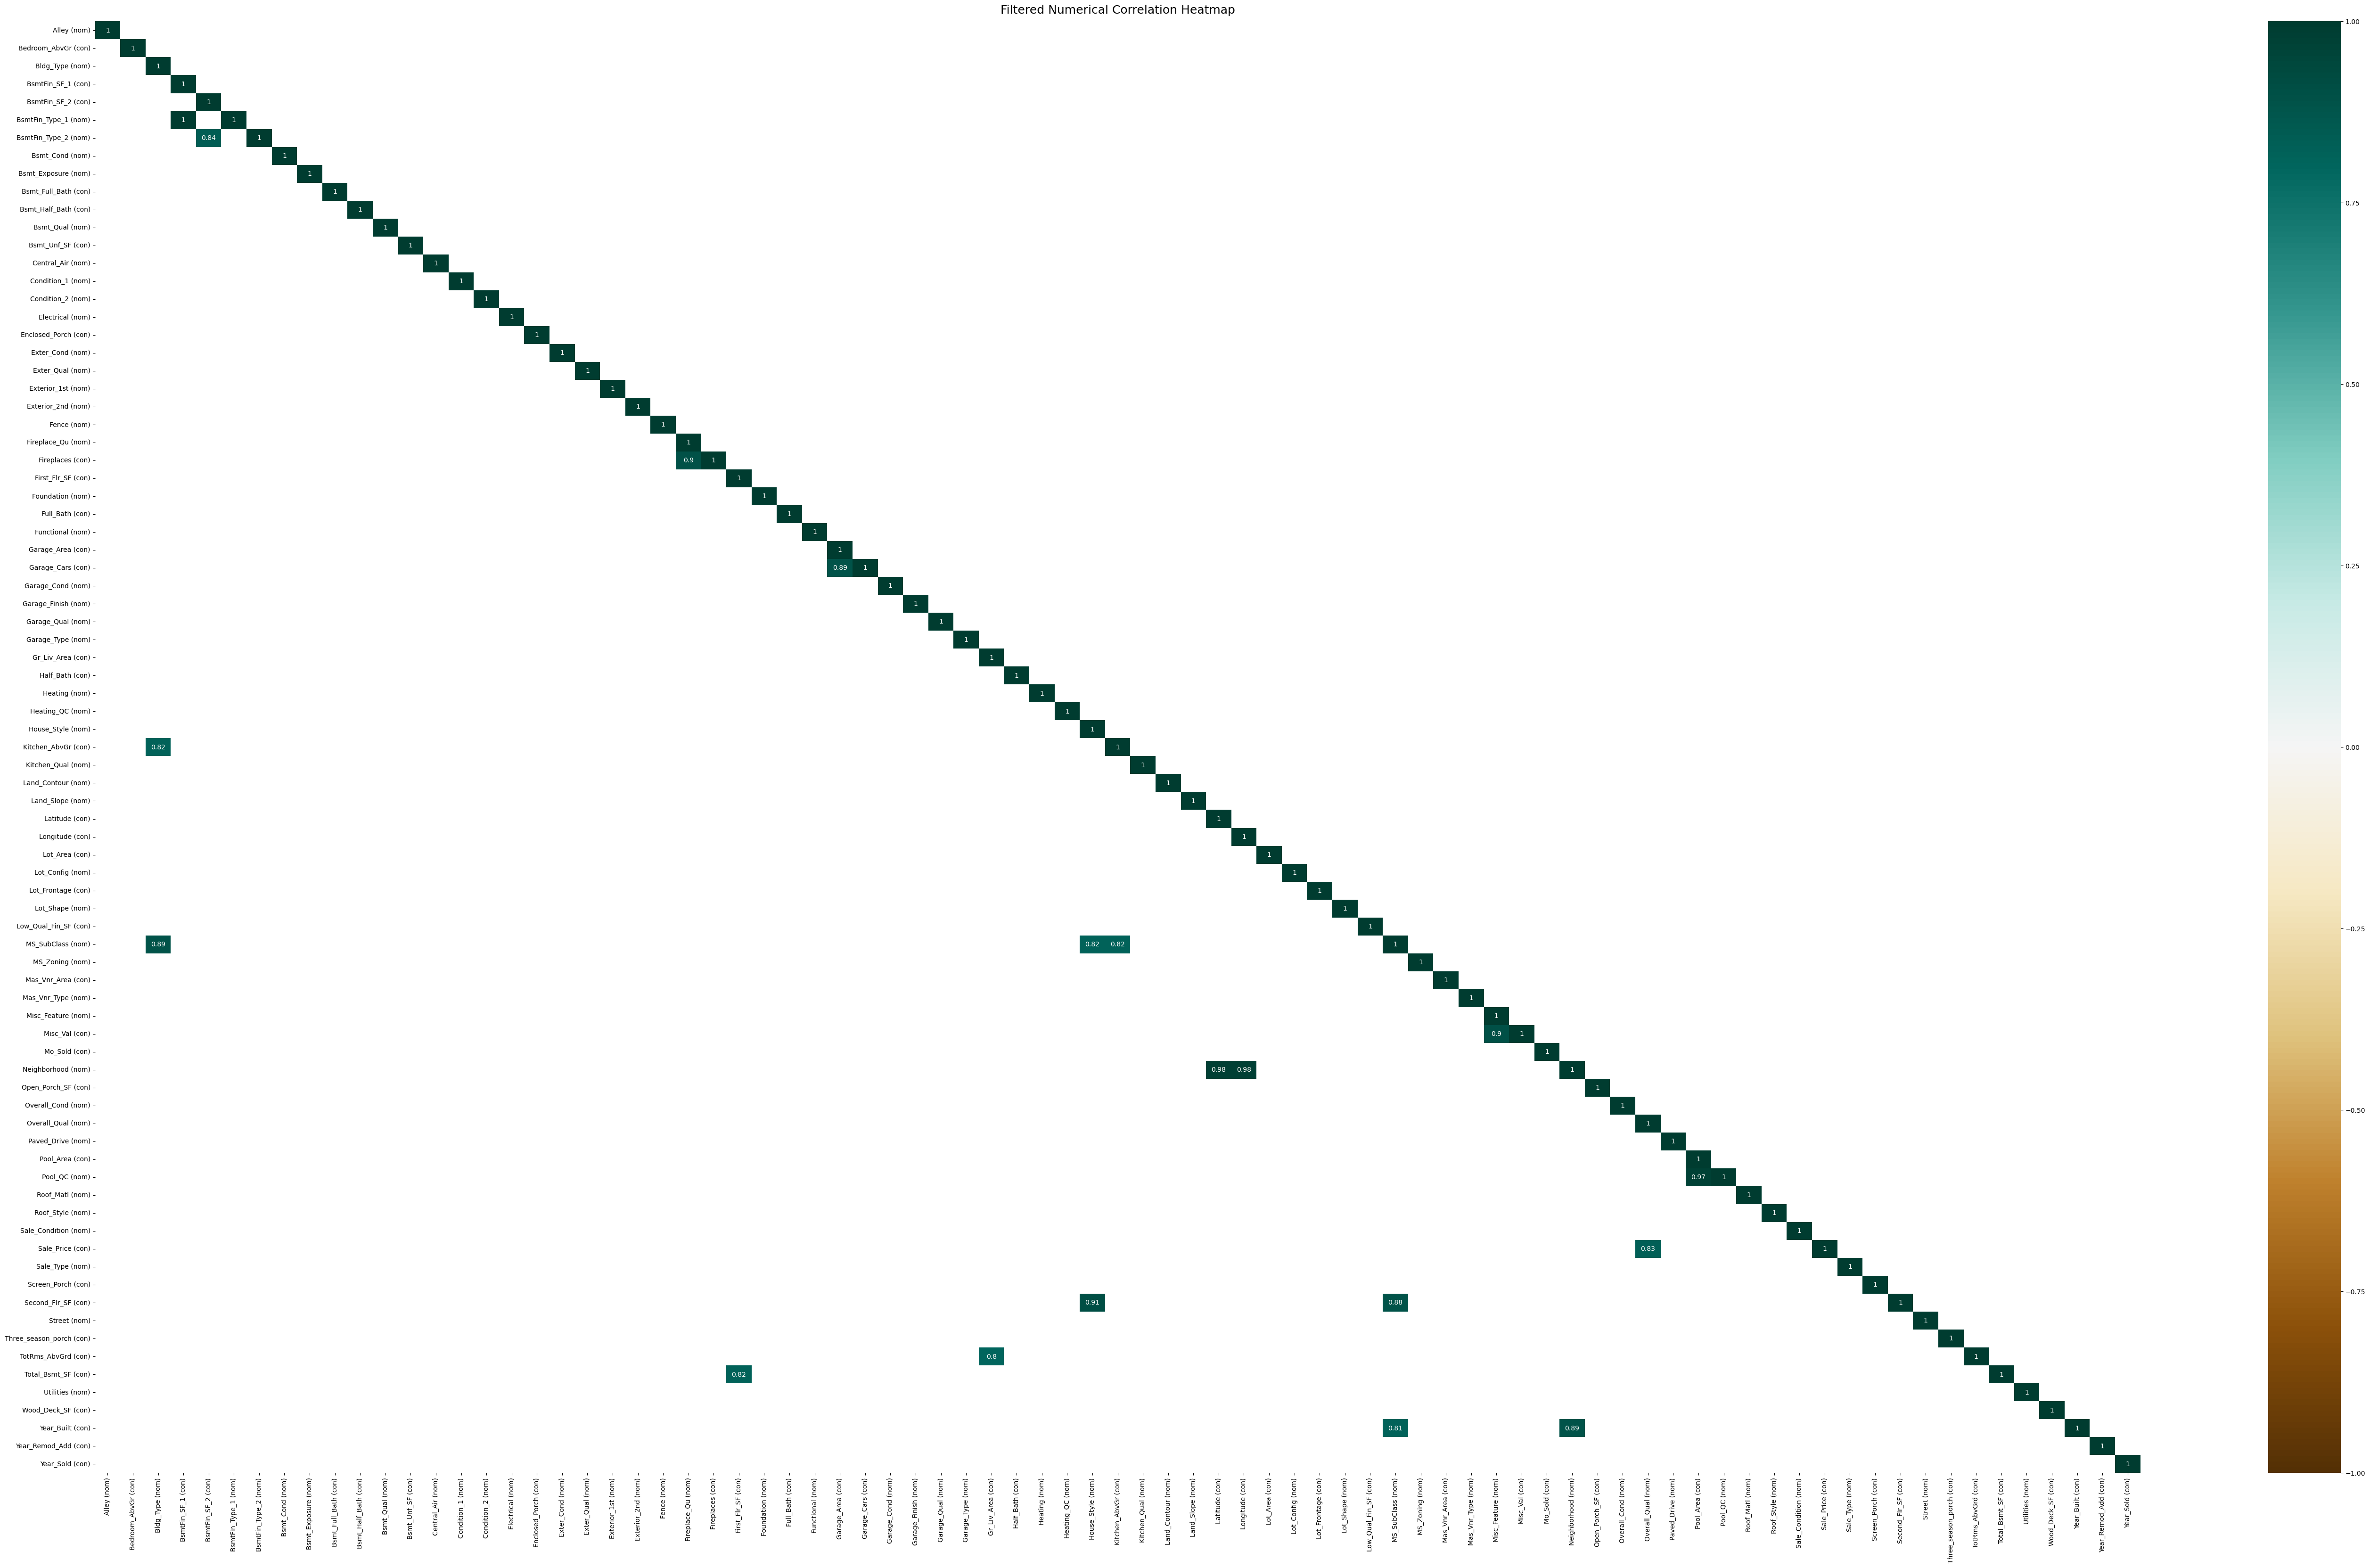

In [12]:
corr_heatmap(complete_correlation_matrix, 0.8, True, 70,40)

In [15]:
'''
Extract couples inside correlation matrix dataset with
correlation value higher than a set threshold
'''
def extract_corr_couples(corr_matrix, threshold): 
    couples=[]
    for rowIndex, row in corr_matrix.iterrows(): #iterate over rows
        for columnIndex, value in row.items(): #iterate over columns 
            if value!=1 and value>=threshold: #check corr_value
                couples.append((rowIndex,columnIndex,value)) # append tuple with two features and corr_vaule (foreach couple)
            
    for element in couples:
        couples.remove((element[1],element[0], element[2])) #remove duplicate combination from couples list
        
    return sorted(couples, key=lambda x : x[2], reverse=True) #sort by value, descending order

def visualize_couples(couples_list):
    for couple in couples_list :
        print(couple)


In [16]:
high_couples=extract_corr_couples(complete_correlation_matrix, 0.7)
visualize_couples(high_couples)

('BsmtFin_SF_1 (con)', 'BsmtFin_Type_1 (nom)', 0.9988829248256146)
('Latitude (con)', 'Neighborhood (nom)', 0.9815569787821736)
('Longitude (con)', 'Neighborhood (nom)', 0.978291153476429)
('Pool_Area (con)', 'Pool_QC (nom)', 0.9730416768872036)
('House_Style (nom)', 'Second_Flr_SF (con)', 0.9102773035234304)
('Misc_Feature (nom)', 'Misc_Val (con)', 0.9016944647208485)
('Fireplace_Qu (nom)', 'Fireplaces (con)', 0.8982194555726364)
('Garage_Area (con)', 'Garage_Cars (con)', 0.8885164099122842)
('Neighborhood (nom)', 'Year_Built (con)', 0.8870163515685292)
('Bldg_Type (nom)', 'MS_SubClass (nom)', 0.8855951213304695)
('MS_SubClass (nom)', 'Second_Flr_SF (con)', 0.8828806686660361)
('BsmtFin_SF_2 (con)', 'BsmtFin_Type_2 (nom)', 0.8401540187222726)
('Overall_Qual (nom)', 'Sale_Price (con)', 0.8313688189268291)
('House_Style (nom)', 'MS_SubClass (nom)', 0.8197599286576803)
('First_Flr_SF (con)', 'Total_Bsmt_SF (con)', 0.8189521905642522)
('Kitchen_AbvGr (con)', 'MS_SubClass (nom)', 0.8188053

In [17]:
def drop_column(column_list, df):
    df.drop(column_list, axis=1, inplace=True)

In [ ]:
'''
#Label encoding:
Bsmt_Cond
Bsmt_Qual
Exter_Cond
Exter_Qual
Fireplace_Qu
Garage_Cond
Garage_Qual
Heating_QC
Kitchen_Qual
Lot_Shape
Overall_Cond
Overall_Qual

#One Hot encoding:
Alley
Bldg_Type
BsmtFin_Type_1
BsmtFin_Type_2
Bsmt_Exposure
Condition_1
Condition_2
Electrical
Exterior_1st
Exterior_2nd
Foundation
Functional
Garage_Finish
Garage_Type
Heating
House_Style
Land_Contour
Land_Slope
Lot_Config
MS_SubClass
MS_Zoning
Mas_Vnr_Type
Misc_Feature
Neighborhood
Paved_Drive
Roof_Matl
Roof_Style
Sale_Condition
Sale_Type
Street
Utilities
'''

In [ ]:
#drop sale price from train and test dataset
X_test.drop(['Sale_Price'], axis=1, inplace=True)
X_train.drop(['Sale_Price'], axis=1, inplace=True)


In [4]:
def save_session() :

    dill.dump_session('notebook_env.db')

In [1]:
def load_session():
    import dill
    dill.load_session('notebook_env.db')

In [ ]:
save_session()

In [2]:
load_session()

c:\Users\Marco\Projects\house_prediction\conda-env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
